In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
df=pd.read_csv('drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


[]

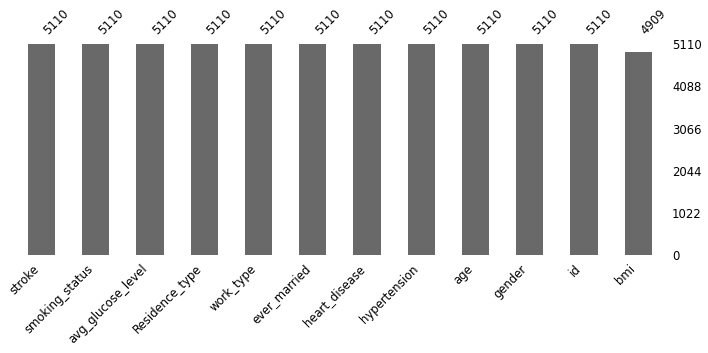

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
print(df.shape)
df.info()
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
msno.bar(df, sort = 'descending', 
         ax = ax, fontsize =12,
         labels = 'off',filter = 'top')
ax.set_yticklabels('')

Main takeaways so far:
1. Data about Body Mass index (BMI) is missing.
2. There are categorical (gender, ever_married, work_type, Residence_type, smoking_status) and numerical features (id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke).
3. Categorical data require specific way of visualization.

(4908, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


[]

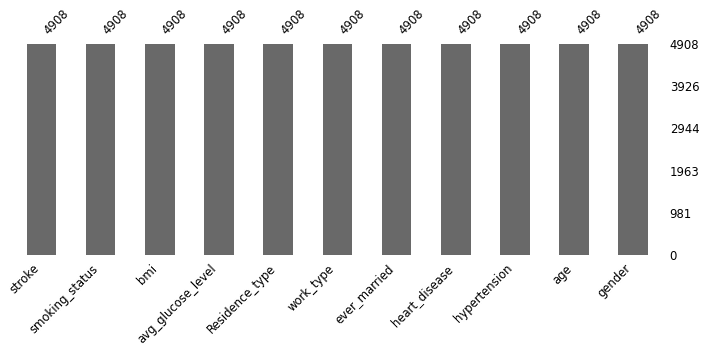

In [ ]:
df.dropna(inplace=True)
del df['id']

print(df.shape)
df.info()
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
msno.bar(df, sort = 'descending', 
         ax = ax, fontsize =12,
         labels = 'off',filter = 'top')
ax.set_yticklabels('')


In [ ]:
df[df['smoking_status']=='Unknown']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
31,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
38,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
67,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5098,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


People with stroke have:
1. High average glucose level
2. Old age
3. BMI below 60 

Text(0.5, 1.0, 'Number of instances in each class')

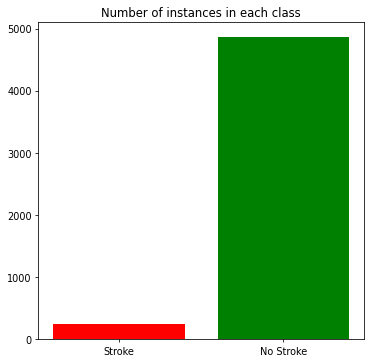

In [ ]:
# show number of instances in each class
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.bar('Stroke', x.stroke[1], color='red')
ax.bar('No Stroke', x.stroke[0], color='green')
plt.title("Number of instances in each class")

1. 5 people from 100 have stroke
2. Highly unbalanced data 

Text(0.5, 1.0, 'Age-Stroke Distribution')

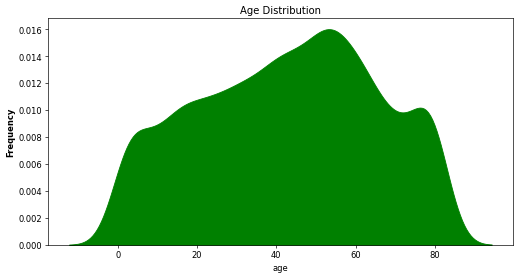

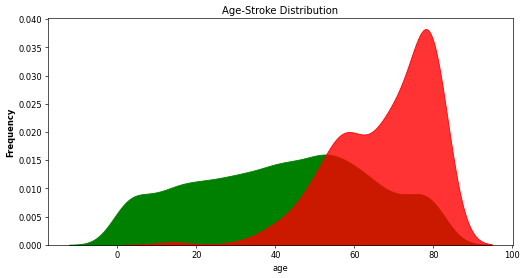

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df, x = 'age', ax = ax, shade = True, color = 'green', alpha = 1, )
fig.show()
plt.title("Age Distribution")
fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df[df['stroke'] == 0], x = 'age', ax=ax, shade = True,  alpha = 1, color = 'green' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age', ax=ax, shade = True,  alpha = 0.8, color = 'red')
fig.show()


plt.title("Age-Stroke Distribution")

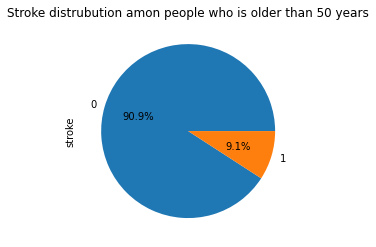

In [ ]:
df[df['age']>=50]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distrubution amon people who is older than 50 years')

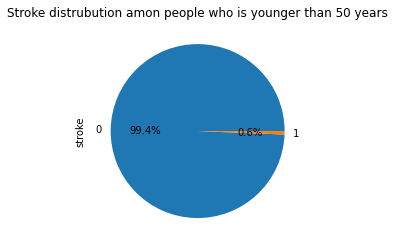

In [ ]:
df[df['age']<50]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distrubution amon people who is younger than 50 years')

1. Old age people have more strokes than young ones

Text(0.5, 1.0, 'Age-Stroke Distribution for Females')

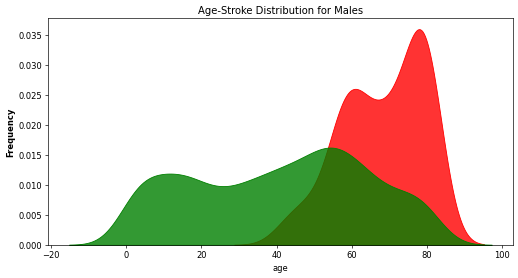

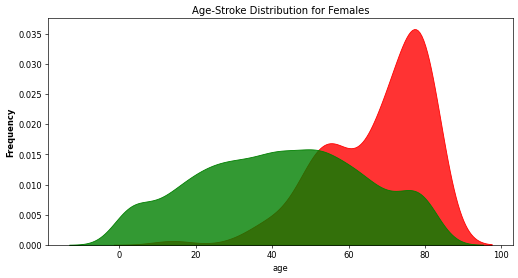

In [ ]:
stroke = df[df['stroke']==1]
no_stroke = df[df['stroke']==0]
stroke_male = stroke[stroke['gender']=='Male']
no_stroke_male = no_stroke[no_stroke['gender']=='Male']
stroke_female = stroke[stroke['gender']=='Female']
no_stroke_female = no_stroke[no_stroke['gender']=='Female']

fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data =stroke_male, x = 'age', ax=ax, shade = True,  alpha = 0.8, color = 'red')
sns.kdeplot(data = no_stroke_male, x = 'age', ax=ax, shade = True,  alpha = 0.8, color = 'green')
fig.show()
plt.title("Age-Stroke Distribution for Males")

fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data =stroke_female, x = 'age', ax=ax, shade = True,  alpha = 0.8, color = 'red')
sns.kdeplot(data = no_stroke_female, x = 'age', ax=ax, shade = True,  alpha = 0.8, color = 'green')
fig.show()
plt.title("Age-Stroke Distribution for Females")

1. Males are more prone to stroke in early 50-60
2. Females in late 70

Text(0.5, 1.0, 'Glucuse Level-Stroke Distribution')

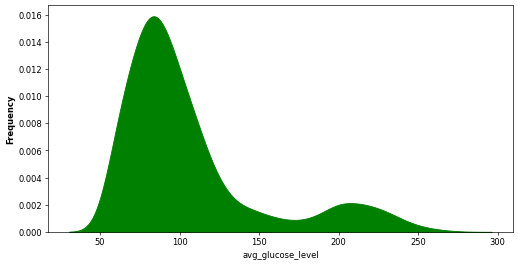

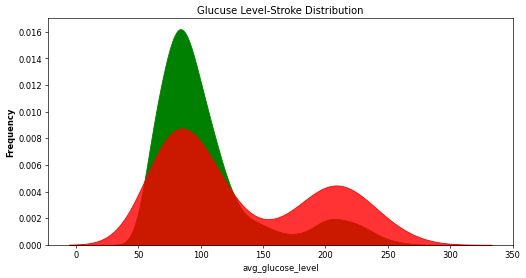

In [ ]:

fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax, shade = True, color = 'green', alpha = 1, )
fig.show()
fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level', ax=ax, shade = True,  alpha = 1, color = 'green' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level', ax=ax, shade = True,  alpha = 0.8, color = 'red')

fig.show()
plt.title("Glucuse Level-Stroke Distribution")

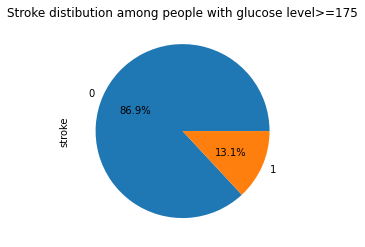

In [ ]:
df[df['avg_glucose_level']>=175]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distibution among people with glucose level>=175')

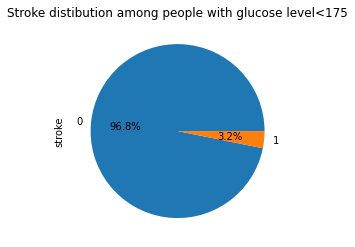

In [ ]:
df[df['avg_glucose_level']<175]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distibution among people with glucose level<175')

In [ ]:
df[df['smoking_status']!='Unknown'].count().to_numpy()[0]

3425

Text(0.5, 1.0, 'Null values distribution of smoking status')

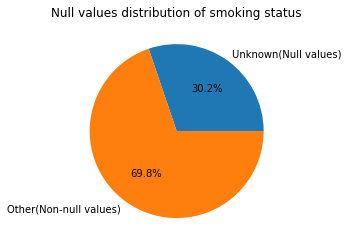

In [ ]:
plt.pie([df[df['smoking_status']=='Unknown'].count().to_numpy().tolist()[0],df[df['smoking_status']!='Unknown'].count().to_numpy()[0]],autopct='%1.1f%%', labels=['Unknown(Null values)', 'Other(Non-null values)'])
plt.title('Null values distribution of smoking status')

Text(0.5, 1.0, 'BMI-Stroke Distribution')

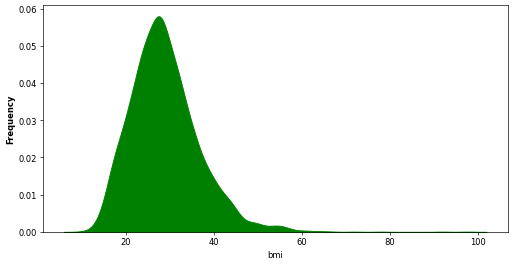

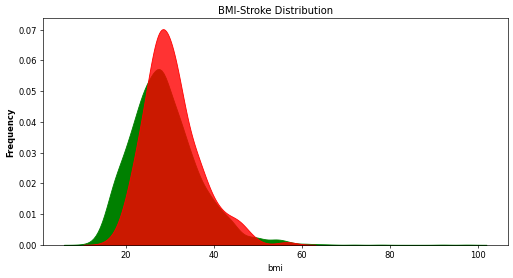

In [ ]:

fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df, x = 'bmi', ax = ax, shade = True, color = 'green', alpha = 1, )
fig.show()
fig, ax = plt.subplots(figsize = (10,5), dpi = 60)
ax.set_ylabel('Frequency',fontweight ='bold')
sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi', ax=ax, shade = True,  alpha = 1, color = 'green' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi', ax=ax, shade = True,  alpha = 0.8, color = 'red')

fig.show()
plt.title("BMI-Stroke Distribution")

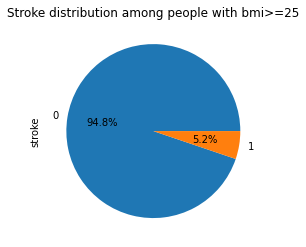

In [ ]:
df[(df['bmi']>=25)]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distribution among people with bmi>=25')

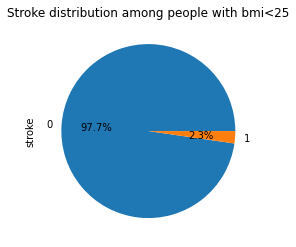

In [ ]:
df[(df['bmi']<25)]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', title='Stroke distribution among people with bmi<25')

Healthy:
 Female    2853
Male      2007
Other        1
Name: gender, dtype: int64
Stroke:
 Female    141
Male      108
Name: gender, dtype: int64


Text(0.5, 1.0, 'Gender Risk')

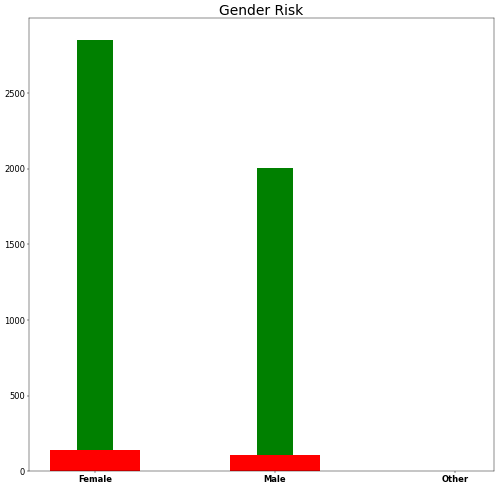

In [ ]:
fig, ax = plt.subplots(figsize = (15,15),dpi = 40)
healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()
print("Healthy:\n" ,healthy_gen)
print("Stroke:\n" ,stroke_gen)
ax.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = 'green')
ax.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= 'red')
ax.set_xticklabels(healthy_gen.index, {'size':15, 'weight':'bold'})
ax.tick_params(axis='y', labelsize=15)
plt.title("Gender Risk", fontsize=25)

In [ ]:
df.drop(df[df['gender']=='Other'].index, inplace=True)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


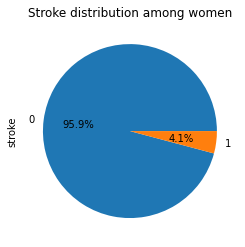

In [ ]:
df[df['gender'] == 'Female']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among women')


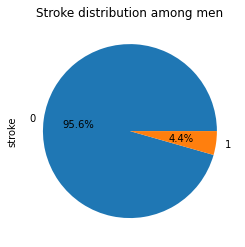

In [ ]:
df[df['gender'] == 'Male']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among men')

Healthy:
 Yes    3133
No     1728
Name: ever_married, dtype: int64
Stroke:
 Yes    220
No      29
Name: ever_married, dtype: int64


Text(0.5, 1.0, 'Marrital Status Risk')

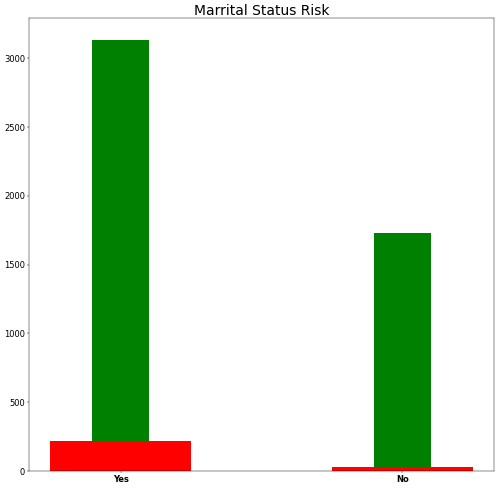

In [ ]:
fig, ax = plt.subplots(figsize = (15,15),dpi = 40)
healthy_gen = df[df['stroke'] == 0].ever_married.value_counts()
stroke_gen = df[df['stroke'] == 1].ever_married.value_counts()
print("Healthy:\n" ,healthy_gen)
print("Stroke:\n" ,stroke_gen)
ax.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = 'green')
ax.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= 'red')
ax.set_xticklabels(healthy_gen.index, {'size':15, 'weight':'bold'})
ax.tick_params(axis='y', labelsize=15)
plt.title("Marrital Status Risk", fontsize=25)

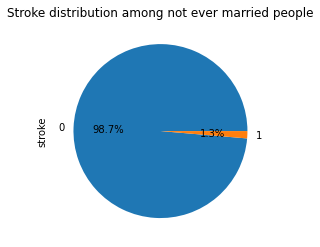

In [ ]:
df[df['ever_married'] == 'No']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among not ever married people')

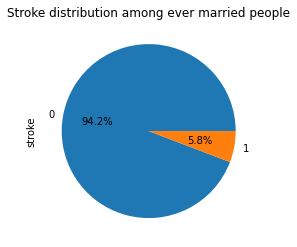

In [ ]:
df[df['ever_married'] == 'Yes']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among ever married people')

Healthy:
 never smoked       1802
Unknown            1497
formerly smoked     815
smokes              747
Name: smoking_status, dtype: int64
Stroke:
 never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64


Text(0.5, 1.0, 'Smoking Status Risk')

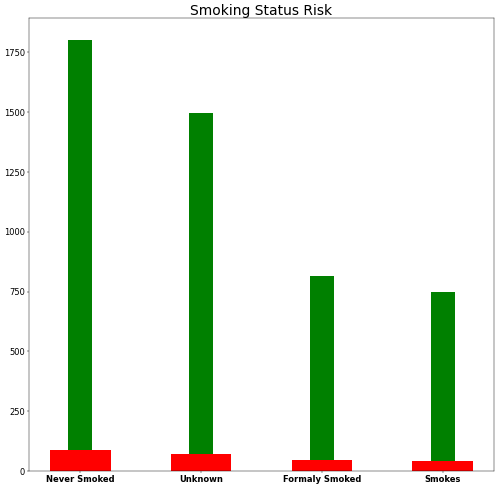

In [ ]:
fig, ax = plt.subplots(figsize = (15,15),dpi = 40)
healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()
print("Healthy:\n" ,healthy_gen)
print("Stroke:\n" ,stroke_gen)
ax.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = 'green')
ax.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= 'red')
ax.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], {'size':15, 'weight':'bold'})
ax.tick_params(axis='y', labelsize=15)
plt.title("Smoking Status Risk", fontsize=25)


Healthy:
 Private          2776
Self-employed     754
children          685
Govt_job          624
Never_worked       22
Name: work_type, dtype: int64
Stroke:
 Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64


Text(0.5, 1.0, 'Work Type Risk')

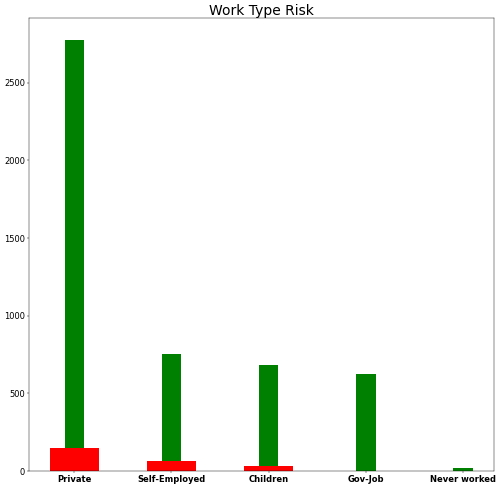

In [ ]:
fig, ax = plt.subplots(figsize = (15,15),dpi = 40)
healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()
print("Healthy:\n" ,healthy_gen)
print("Stroke:\n" ,stroke_gen)
ax.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = 'green')
ax.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= 'red')
ax.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], {'size':15, 'weight':'bold'})
ax.tick_params(axis='y', labelsize=15)
plt.title("Work Type Risk", fontsize=25)


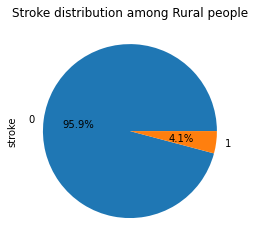

In [ ]:
df[df['Residence_type'] == 'Rural']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among Rural people')

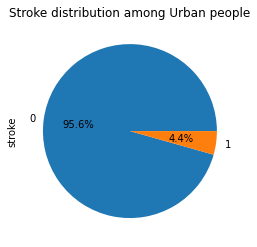

In [ ]:
df[df['Residence_type'] == 'Urban']['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among Urban people')

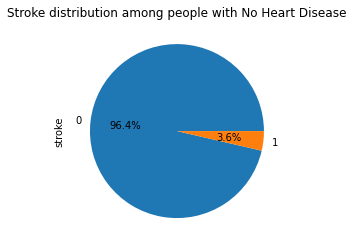

In [ ]:
df[df['heart_disease'] == 0]['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among people with No Heart Disease')

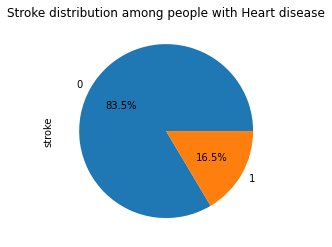

In [ ]:
df[df['heart_disease'] == 1]['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among people with Heart disease')

Healthy:
 0    4429
1     432
Name: hypertension, dtype: int64
Stroke:
 0    183
1     66
Name: hypertension, dtype: int64


Text(0.5, 1.0, 'Hypertension Risk')

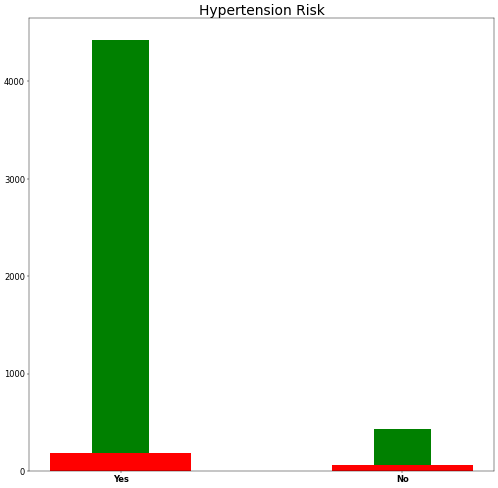

In [ ]:

fig, ax = plt.subplots(figsize = (15,15),dpi = 40)
healthy_gen = df[df['stroke'] == 0].hypertension.value_counts()
stroke_gen = df[df['stroke'] == 1].hypertension.value_counts()
print("Healthy:\n" ,healthy_gen)
print("Stroke:\n" ,stroke_gen)
ax.bar( ['Yes','No'], height = healthy_gen.values, width = 0.2,color = 'green')
ax.bar(stroke_gen.index, height = stroke_gen.values, width = 0.5,color= 'red')
ax.set_xticklabels(['Yes','No'], {'size':15, 'weight':'bold'})
ax.tick_params(axis='y', labelsize=15)
plt.title("Hypertension Risk", fontsize=25)


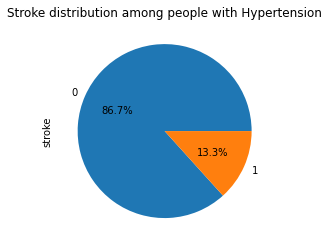

In [ ]:
df[df['hypertension'] == 1]['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among people with Hypertension')

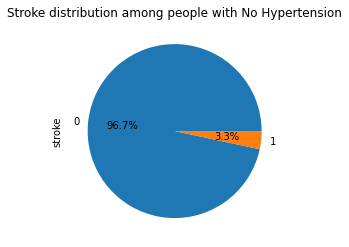

In [ ]:
df[df['hypertension'] == 0]['stroke'].value_counts().plot.pie(autopct='%1.1f%%',title='Stroke distribution among people with No Hypertension')

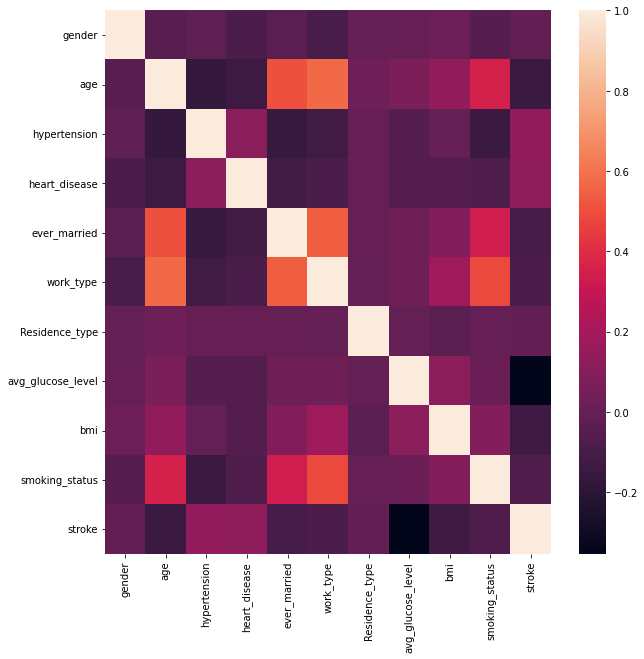

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
value_to_int = {j:i for i,j in enumerate(pd.unique(df.values.ravel()))}
sns.heatmap(df.replace(value_to_int).corr(), ax=ax)